In [1]:
import tqdm
import numpy as np

import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

from mnist_loader import MNISTDataset, train_test_split
from autoencoders import (
    SimpleEncoder, 
    SimpleDecoder, 
    DeepEncoder,
    DeepDecoder,
    AutoEncoder,
    ConvAutoEncoder,
    ConvAutoEncoderV2,
)
from functions import train_model, ImagePlotter

import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
torch.random.manual_seed(42)

LATENT_DIM = 20

In [3]:
mnist = datasets.MNIST('/home/andrei/datasets') 
# use data and targets only, supports __getitem__, 60000 images 28x28 px

In [4]:
train, test, plot_idx, labels = train_test_split(train_ratio=0.8, mnist=mnist)

In [5]:
image_transforms = transforms.ToTensor()
trainset = MNISTDataset(train, mnist, image_transforms)
testset = MNISTDataset(test, mnist, image_transforms)

In [6]:
trainloader = DataLoader(trainset, shuffle=True, batch_size=128, num_workers=2)
testloader = DataLoader(testset, shuffle=False, batch_size=128, num_workers=2)

In [7]:
device = torch.device('cpu')

## Simple autoencoder

One hidden layer

In [16]:
encoder = SimpleEncoder(num_features=LATENT_DIM)
decoder = SimpleDecoder(num_features=LATENT_DIM)

model = AutoEncoder(encoder, decoder)
model.to(device)
model.eval()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.BCELoss()

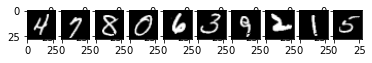

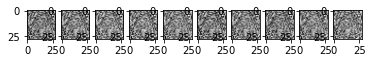

test loss: 65.3101
 Epoch 0, train loss: 107.0165, test loss: 19.2670


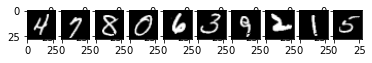

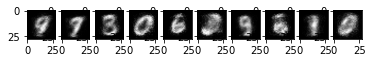

 Epoch 1, train loss: 69.6355, test loss: 15.9360


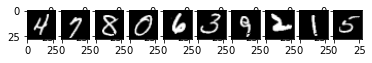

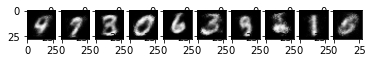

 Epoch 2, train loss: 60.8407, test loss: 14.5275


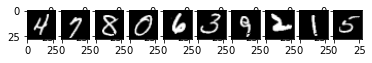

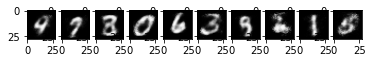

 Epoch 3, train loss: 56.7066, test loss: 13.8099
 Epoch 4, train loss: 54.5255, test loss: 13.3981
 Epoch 5, train loss: 53.1376, test loss: 13.1137
 Epoch 6, train loss: 52.1415, test loss: 12.8920
 Epoch 7, train loss: 51.4315, test loss: 12.7479
 Epoch 8, train loss: 50.9380, test loss: 12.6480
 Epoch 9, train loss: 50.6281, test loss: 12.5891


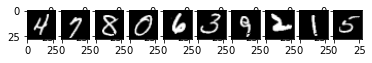

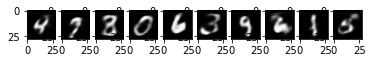

 Epoch 10, train loss: 50.4187, test loss: 12.5493
 Epoch 11, train loss: 50.2855, test loss: 12.5251
 Epoch 12, train loss: 50.1768, test loss: 12.5060
 Epoch 13, train loss: 50.1035, test loss: 12.4940
 Epoch 14, train loss: 50.0332, test loss: 12.4900
 Epoch 15, train loss: 49.9788, test loss: 12.4621
 Epoch 16, train loss: 49.9310, test loss: 12.4499
 Epoch 17, train loss: 49.8864, test loss: 12.4322
 Epoch 18, train loss: 49.8454, test loss: 12.4426
 Epoch 19, train loss: 49.8103, test loss: 12.4246


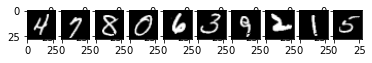

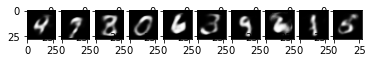

 Epoch 20, train loss: 49.7760, test loss: 12.4223
 Epoch 21, train loss: 49.7404, test loss: 12.4134
 Epoch 22, train loss: 49.7114, test loss: 12.3951
 Epoch 23, train loss: 49.6719, test loss: 12.3927
 Epoch 24, train loss: 49.6449, test loss: 12.3946
 Epoch 25, train loss: 49.6246, test loss: 12.3936
 Epoch 26, train loss: 49.6000, test loss: 12.3774
 Epoch 27, train loss: 49.5706, test loss: 12.3639
 Epoch 28, train loss: 49.5410, test loss: 12.3611
 Epoch 29, train loss: 49.5232, test loss: 12.3585


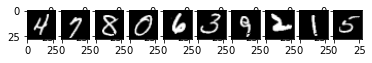

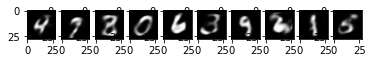

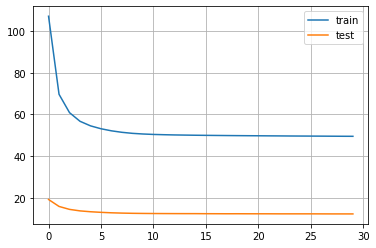

In [17]:
image_plotter = ImagePlotter(image_transforms=image_transforms, mnist=mnist, indexes=plot_idx)

model, optimizer = train_model(
    model=model,
    optimizer=optimizer,
    loss_fn=loss_fn,
    trainloader=trainloader,
    testloader=testloader,
    device=device,
    epochs=30,
    image_plotter=image_plotter,
)


## Deep autoencoder

Three hidden layers

In [18]:
encoder = DeepEncoder(num_features=LATENT_DIM)
decoder = DeepDecoder(num_features=LATENT_DIM)

model = AutoEncoder(encoder, decoder)
model.to(device)
model.eval()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.BCELoss()

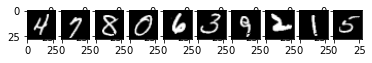

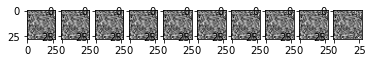

test loss: 65.1412
 Epoch 0, train loss: 107.7566, test loss: 22.4765


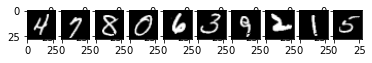

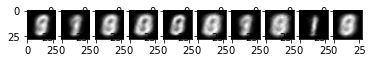

 Epoch 1, train loss: 81.4243, test loss: 18.0844


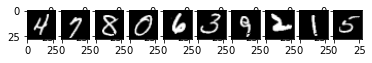

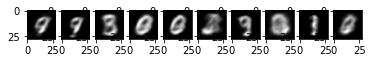

 Epoch 2, train loss: 68.0336, test loss: 15.9351


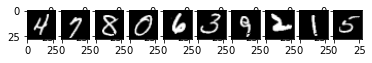

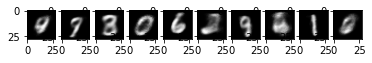

 Epoch 3, train loss: 62.2994, test loss: 15.1891
 Epoch 4, train loss: 59.9048, test loss: 14.6926
 Epoch 5, train loss: 57.5835, test loss: 13.9669
 Epoch 6, train loss: 54.9244, test loss: 13.4559
 Epoch 7, train loss: 53.2871, test loss: 13.0804
 Epoch 8, train loss: 51.7107, test loss: 12.7075
 Epoch 9, train loss: 50.3607, test loss: 12.4538


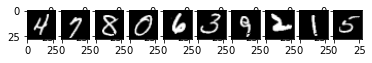

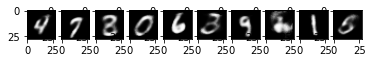

 Epoch 10, train loss: 49.5117, test loss: 12.2794
 Epoch 11, train loss: 48.8983, test loss: 12.1222
 Epoch 12, train loss: 48.3648, test loss: 12.0149
 Epoch 13, train loss: 47.8155, test loss: 11.8663
 Epoch 14, train loss: 47.3537, test loss: 11.7693
 Epoch 15, train loss: 46.9772, test loss: 11.7058
 Epoch 16, train loss: 46.6383, test loss: 11.6248
 Epoch 17, train loss: 46.3543, test loss: 11.5347
 Epoch 18, train loss: 46.0573, test loss: 11.4727
 Epoch 19, train loss: 45.7588, test loss: 11.3714


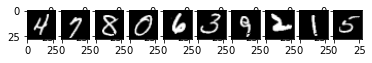

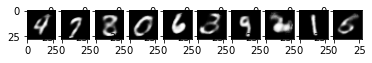

 Epoch 20, train loss: 45.4130, test loss: 11.3215
 Epoch 21, train loss: 45.1083, test loss: 11.2399
 Epoch 22, train loss: 44.8366, test loss: 11.1672
 Epoch 23, train loss: 44.5838, test loss: 11.1301
 Epoch 24, train loss: 44.3996, test loss: 11.0874
 Epoch 25, train loss: 44.2109, test loss: 11.0440
 Epoch 26, train loss: 44.0493, test loss: 11.0136
 Epoch 27, train loss: 43.8733, test loss: 10.9503
 Epoch 28, train loss: 43.6924, test loss: 10.9302
 Epoch 29, train loss: 43.4817, test loss: 10.8571


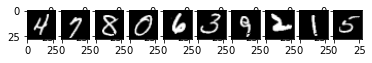

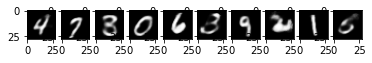

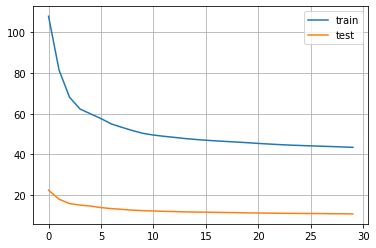

In [19]:
image_plotter = ImagePlotter(image_transforms=image_transforms, mnist=mnist, indexes=plot_idx)

model, optimizer = train_model(
    model=model,
    optimizer=optimizer,
    loss_fn=loss_fn,
    trainloader=trainloader,
    testloader=testloader,
    device=device,
    epochs=30,
    image_plotter=image_plotter,
)


## Convolutional autoencoder

In [22]:
model = ConvAutoEncoder()
model.to(device)
model.eval()

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = torch.nn.BCELoss()

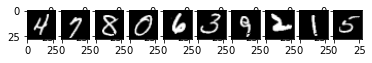

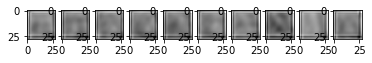

test loss: 65.0132
 Epoch 0, train loss: 84.1116, test loss: 11.9637


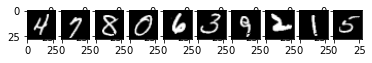

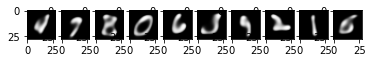

 Epoch 1, train loss: 43.1780, test loss: 9.9821


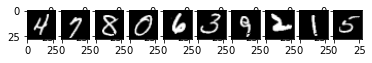

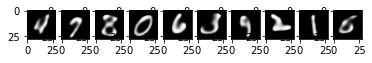

 Epoch 2, train loss: 38.4467, test loss: 9.2528


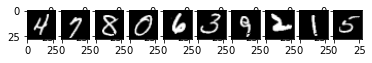

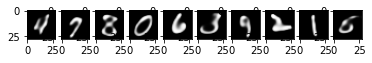

 Epoch 3, train loss: 36.2469, test loss: 8.8387
 Epoch 4, train loss: 34.8687, test loss: 8.5687
 Epoch 5, train loss: 33.9178, test loss: 8.3589
 Epoch 6, train loss: 33.2018, test loss: 8.2104
 Epoch 7, train loss: 32.6500, test loss: 8.0862
 Epoch 8, train loss: 32.2207, test loss: 7.9962
 Epoch 9, train loss: 31.8386, test loss: 7.8940


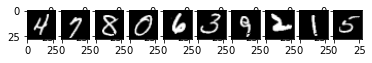

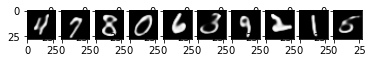

 Epoch 10, train loss: 31.5396, test loss: 7.8257
 Epoch 11, train loss: 31.2661, test loss: 7.7926
 Epoch 12, train loss: 31.0530, test loss: 7.7260
 Epoch 13, train loss: 30.8438, test loss: 7.6598
 Epoch 14, train loss: 30.6474, test loss: 7.6323
 Epoch 15, train loss: 30.5048, test loss: 7.5770
 Epoch 16, train loss: 30.3491, test loss: 7.5535
 Epoch 17, train loss: 30.2176, test loss: 7.5161
 Epoch 18, train loss: 30.0760, test loss: 7.4781
 Epoch 19, train loss: 29.9680, test loss: 7.4534


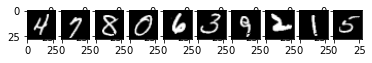

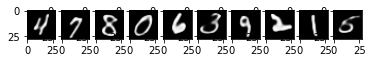

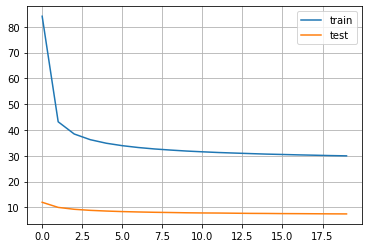

In [23]:
image_plotter = ImagePlotter(image_transforms=image_transforms, mnist=mnist, indexes=plot_idx)

model, optimizer = train_model(
    model=model,
    optimizer=optimizer,
    loss_fn=loss_fn,
    trainloader=trainloader,
    testloader=testloader,
    device=device,
    epochs=20,
    image_plotter=image_plotter,
)


## Convolutional autoencoder,  V2

In [24]:
model = ConvAutoEncoderV2()
model.to(device)
model.eval()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.BCELoss()

/home/aruslantsev/miniconda3/lib/python3.9/site-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


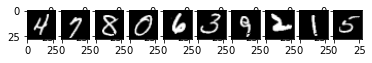

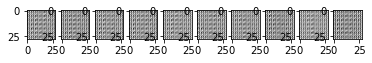

test loss: 83.3515
 Epoch 0, train loss: 133.9808, test loss: 17.0095


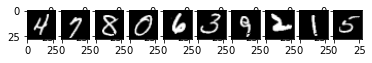

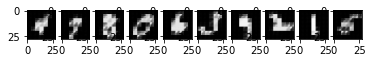

 Epoch 1, train loss: 56.5402, test loss: 11.9399


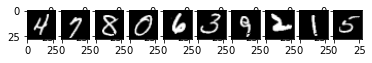

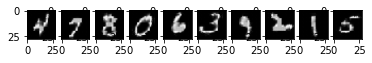

 Epoch 2, train loss: 45.4918, test loss: 10.9929


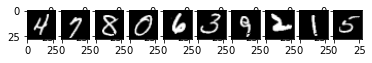

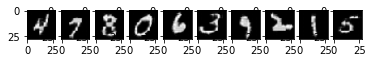

 Epoch 3, train loss: 43.1745, test loss: 10.5819
 Epoch 4, train loss: 41.7974, test loss: 10.2967
 Epoch 5, train loss: 40.8054, test loss: 10.0861
 Epoch 6, train loss: 40.0575, test loss: 9.9208
 Epoch 7, train loss: 39.4530, test loss: 9.7915
 Epoch 8, train loss: 38.9817, test loss: 9.6793
 Epoch 9, train loss: 38.5751, test loss: 9.5859


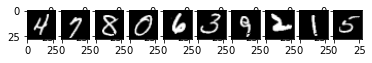

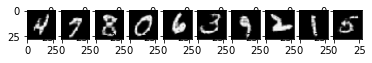

 Epoch 10, train loss: 38.2179, test loss: 9.4993
 Epoch 11, train loss: 37.9004, test loss: 9.4284
 Epoch 12, train loss: 37.6122, test loss: 9.3569
 Epoch 13, train loss: 37.3606, test loss: 9.3003
 Epoch 14, train loss: 37.1562, test loss: 9.2523
 Epoch 15, train loss: 36.9550, test loss: 9.2039
 Epoch 16, train loss: 36.7650, test loss: 9.1599
 Epoch 17, train loss: 36.6191, test loss: 9.1287
 Epoch 18, train loss: 36.4962, test loss: 9.0994
 Epoch 19, train loss: 36.3964, test loss: 9.0738


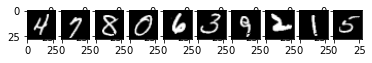

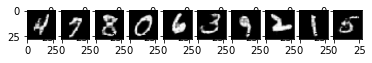

 Epoch 20, train loss: 36.3122, test loss: 9.0602
 Epoch 21, train loss: 36.2448, test loss: 9.0384
 Epoch 22, train loss: 36.1792, test loss: 9.0288
 Epoch 23, train loss: 36.1192, test loss: 9.0073
 Epoch 24, train loss: 36.0669, test loss: 8.9970
 Epoch 25, train loss: 36.0219, test loss: 8.9882
 Epoch 26, train loss: 35.9775, test loss: 8.9766
 Epoch 27, train loss: 35.9353, test loss: 8.9674
 Epoch 28, train loss: 35.8940, test loss: 8.9675
 Epoch 29, train loss: 35.8511, test loss: 8.9430


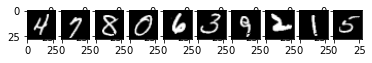

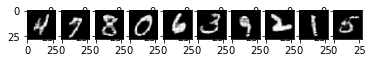

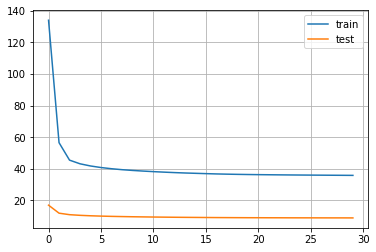

In [25]:
image_plotter = ImagePlotter(image_transforms=image_transforms, mnist=mnist, indexes=plot_idx)

model, optimizer = train_model(
    model=model,
    optimizer=optimizer,
    loss_fn=loss_fn,
    trainloader=trainloader,
    testloader=testloader,
    device=device,
    epochs=30,
    image_plotter=image_plotter,
)


## Denoising with convolutional autoencoder v2

In [8]:
model = ConvAutoEncoderV2()
model.to(device)
model.eval()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.BCELoss()

[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.
/home/andrei/miniconda3/lib/python3.9/site-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


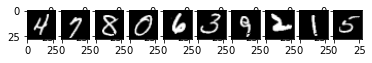

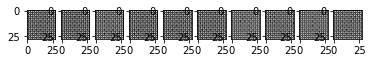

test loss: 60.1414
 Epoch 0, train loss: 131.3255, test loss: 25.7693


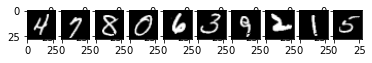

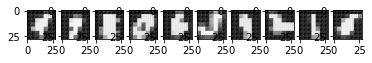

 Epoch 1, train loss: 91.1343, test loss: 20.8833


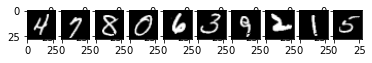

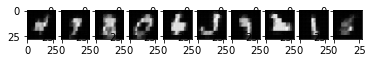

 Epoch 2, train loss: 81.6616, test loss: 20.0562


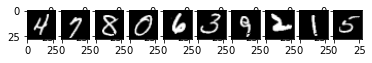

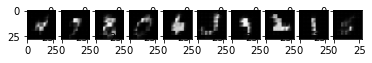

 Epoch 3, train loss: 79.1679, test loss: 19.4856
 Epoch 4, train loss: 77.3785, test loss: 19.1765
 Epoch 5, train loss: 76.3718, test loss: 18.9515
 Epoch 6, train loss: 75.6480, test loss: 18.7960
 Epoch 7, train loss: 75.1774, test loss: 18.7529
 Epoch 8, train loss: 74.8714, test loss: 18.6624
 Epoch 9, train loss: 74.6184, test loss: 18.5747


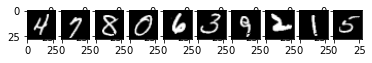

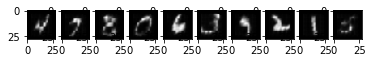

 Epoch 10, train loss: 74.3289, test loss: 18.5484
 Epoch 11, train loss: 74.1860, test loss: 18.5102
 Epoch 12, train loss: 73.9693, test loss: 18.4860
 Epoch 13, train loss: 73.8237, test loss: 18.4410
 Epoch 14, train loss: 73.7602, test loss: 18.3815
 Epoch 15, train loss: 73.6719, test loss: 18.3942
 Epoch 16, train loss: 73.5404, test loss: 18.4195
 Epoch 17, train loss: 73.4370, test loss: 18.3711
 Epoch 18, train loss: 73.4386, test loss: 18.3255
 Epoch 19, train loss: 73.3538, test loss: 18.3327


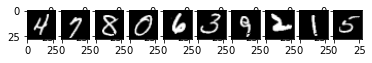

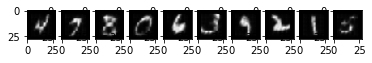

 Epoch 20, train loss: 73.2579, test loss: 18.2993
 Epoch 21, train loss: 73.2632, test loss: 18.2996
 Epoch 22, train loss: 73.2421, test loss: 18.2765
 Epoch 23, train loss: 73.1341, test loss: 18.2506
 Epoch 24, train loss: 73.0827, test loss: 18.2846
 Epoch 25, train loss: 73.0583, test loss: 18.2473
 Epoch 26, train loss: 72.9684, test loss: 18.2443
 Epoch 27, train loss: 73.0466, test loss: 18.2273
 Epoch 28, train loss: 72.9917, test loss: 18.2505
 Epoch 29, train loss: 72.9605, test loss: 18.2269


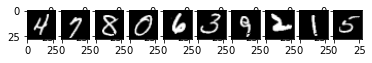

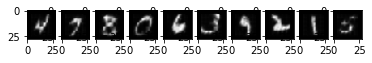

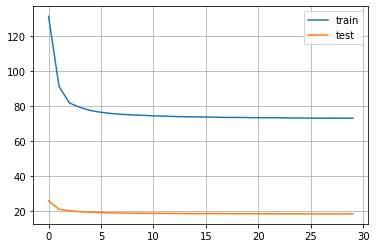

In [9]:
image_plotter = ImagePlotter(image_transforms=image_transforms, mnist=mnist, indexes=plot_idx)

model, optimizer = train_model(
    model=model,
    optimizer=optimizer,
    loss_fn=loss_fn,
    trainloader=trainloader,
    testloader=testloader,
    device=device,
    epochs=30,
    image_plotter=image_plotter,
    add_noise=True,
)
